In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



LOADING THE DATASET

Meaning of the columns
FTHG - FULL TIME HOME GOAL
FTAG - FULL TIME AWAY GOAL
FTR - FULL TIME RESULTS
HTHG - HALFTIME HOME GOAL
HTAG - HALFTIME AWAY GOAL
HTR - HALFTIME RESULTS
referee
HS - HOME TEAM SHOTS
AS - AWAY TEAM SHOTS
HST - HOME TEAM SHOT ON GOAL
AST - AWAY TEAM SHOT ON GOAL
HF - HOME TEAM FOUL
AF- AWAY TEAM FOUL
HC - HOME TEAM CORNERS
AC - AWAY TEAM CORNERS
HY - HOME TEAM YELLOW CARDS
AY - AWAY TEAM YELLOW CARDS
HR - HOME TEAM RED CARDS
AR - AWAY TEAM RED CARDS

In [6]:
df = pd.read_csv('epl_results_2022-23.csv')
df

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,A,...,2,2,16,11,3,5,1,2,0,0
1,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,H,...,3,4,7,9,4,4,2,0,0,0
2,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,H,...,3,2,18,16,5,5,3,3,0,0
3,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,D,...,4,6,13,9,6,4,2,0,0,0
4,06/08/2022,15:00,Newcastle,Nottingham,2,0,H,0,0,D,...,10,0,9,14,11,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,28/05/2023,16:30,Everton,Bournemouth,1,0,H,0,0,D,...,6,2,11,12,9,3,1,3,0,0
376,28/05/2023,16:30,Leeds,Tottenham,1,4,A,0,1,A,...,2,7,7,5,12,3,3,0,0,0
377,28/05/2023,16:30,Leicester,West Ham,2,1,H,1,0,H,...,4,3,8,10,3,5,1,1,0,0
378,28/05/2023,16:30,Man United,Fulham,2,1,H,1,1,D,...,8,3,14,10,5,4,1,2,0,0


Step 3: Explore the Data // EXPLORATORY DATA

In [7]:
# this will give you first 5 datasets 
df.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,A,...,2,2,16,11,3,5,1,2,0,0
1,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,H,...,3,4,7,9,4,4,2,0,0,0
2,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,H,...,3,2,18,16,5,5,3,3,0,0
3,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,D,...,4,6,13,9,6,4,2,0,0,0
4,06/08/2022,15:00,Newcastle,Nottingham,2,0,H,0,0,D,...,10,0,9,14,11,1,0,3,0,0


This brings out the first 5 head of the data in the datasets

In [8]:
# Summary statistics of numeric columns
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.634211,1.218421,0.757895,0.563158,13.952632,11.310526,4.907895,3.894737,10.597368,10.931579,5.636842,4.471053,1.671053,1.915789,0.047368,0.026316
std,1.419944,1.183518,0.918480,0.746998,5.604170,4.941173,2.495260,2.230627,3.288020,3.463424,3.073370,2.817530,1.249677,1.358357,0.224768,0.160284
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,11.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,15.000000,7.000000,5.000000,13.000000,13.000000,8.000000,6.000000,3.000000,3.000000,0.000000,0.000000
max,9.000000,6.000000,5.000000,3.000000,33.000000,30.000000,15.000000,11.000000,23.000000,24.000000,17.000000,19.000000,6.000000,7.000000,2.000000,1.000000


In [10]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      380 non-null    object
 1   Time      380 non-null    object
 2   HomeTeam  380 non-null    object
 3   AwayTeam  380 non-null    object
 4   FTHG      380 non-null    int64 
 5   FTAG      380 non-null    int64 
 6   FTR       380 non-null    object
 7   HTHG      380 non-null    int64 
 8   HTAG      380 non-null    int64 
 9   HTR       380 non-null    object
 10  Referee   380 non-null    object
 11  HS        380 non-null    int64 
 12  AS        380 non-null    int64 
 13  HST       380 non-null    int64 
 14  AST       380 non-null    int64 
 15  HF        380 non-null    int64 
 16  AF        380 non-null    int64 
 17  HC        380 non-null    int64 
 18  AC        380 non-null    int64 
 19  HY        380 non-null    int64 
 20  AY        380 non-null    int64 
 21  HR        380 no

In [11]:
# Check for missing values
df.isnull().sum()


Date        0
Time        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

from this result here we have no missing values 

# DATA VISUALIZATION 

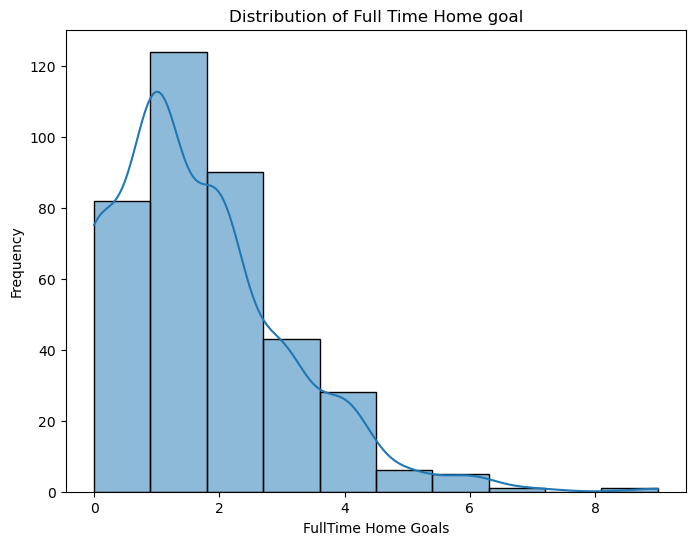

In [23]:
# Example: Create a histogram of Full time Home goal (FTHG)
plt.figure(figsize=(8, 6))
sns.histplot(df['FTHG'], bins=10, kde=True)
plt.title('Distribution of Full Time Home goal')
plt.xlabel('FullTime Home Goals')
plt.ylabel('Frequency')
plt.show()


The x-axis represents the range of possible values for the full-time home goals (FTHG) in my dataset. This range is divided into 10 bins, and each bin represents a specific interval of FTHG values.

The y-axis represents the frequency of occurrences for each bin. In other words, it shows how many matches had FTHG values within a particular interval.

The bars in the histogram represent the count of matches that fall into each bin. Taller bars indicate a higher frequency of matches with FTHG values within that range.

The KDE curve, if enabled (kde=True), provides a smoothed estimate of the probability density of the data. It can give you insights into the distribution's shape and whether it follows a particular pattern (e.g., normal distribution).

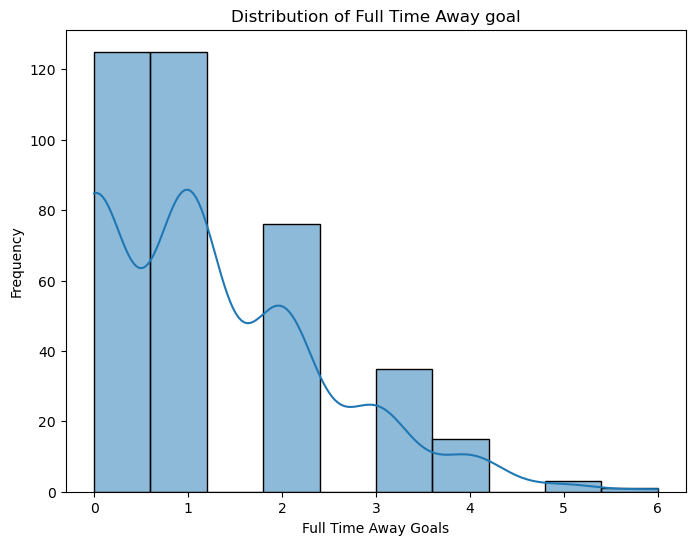

In [18]:
# Example: Create a histogram of Full time Home goal (FTAG)
plt.figure(figsize=(8, 6))
sns.histplot(df['FTAG'], bins=10, kde=True)
plt.title('Distribution of Full Time Away goal')
plt.xlabel('Full Time Away Goals')
plt.ylabel('Frequency')
plt.show()

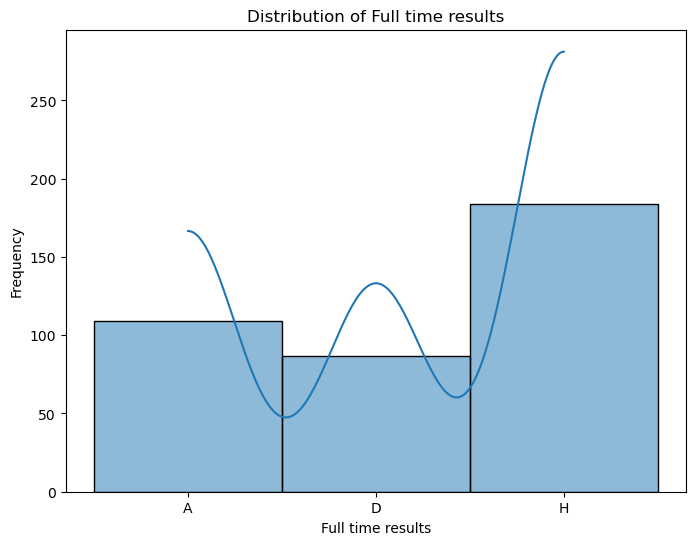

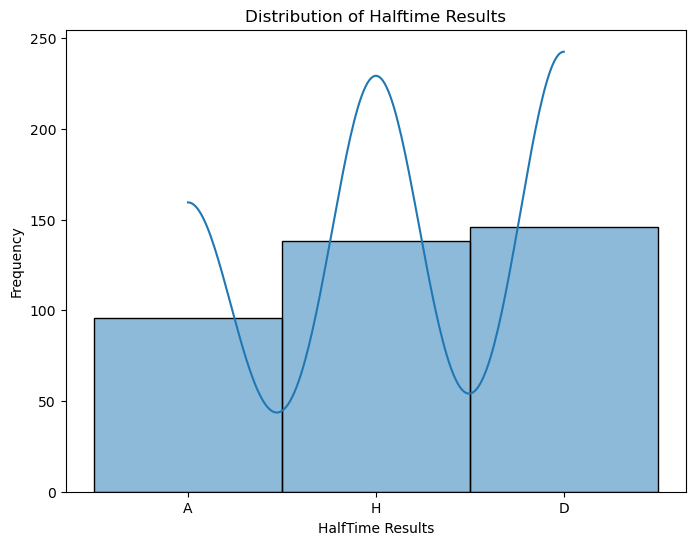

In [42]:
# Example: Create a histogram of Full time results (FTR)
plt.figure(figsize=(8, 6))
sns.histplot(df['FTR'], bins=3, kde=True)
plt.title('Distribution of Full time results')
plt.xlabel('Full time results')
plt.ylabel('Frequency')
plt.show()


#creating histogram for Half time results (HTR)
plt.figure(figsize=(8, 6))
sns.histplot(df['HTR'], kde = True)
plt.title('Distribution of Halftime Results')
plt.xlabel('HalfTime Results')
plt.ylabel('Frequency')
plt.show()

In [ ]:
In this results i noticed that home team won most of their matches because it has thr highest frequency in the graph and away team has a lesser full time results win 

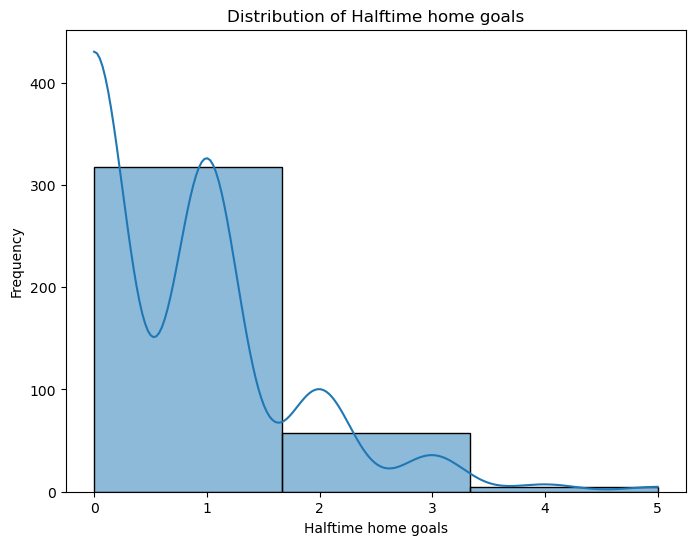

In [24]:
# Example: Create a histogram of Halftime home goals (HTHG)
plt.figure(figsize=(8, 6))
sns.histplot(df['HTHG'], bins=3, kde=True)
plt.title('Distribution of Halftime home goals')
plt.xlabel('Halftime home goals')
plt.ylabel('Frequency')
plt.show()

In [33]:
# Assuming your data is in a DataFrame called df
total_matches = df.shape[0]

print(f"Total matches played by all teams: {total_matches}")

Total matches played by all teams: 380


In [34]:
df.shape

(380, 23)

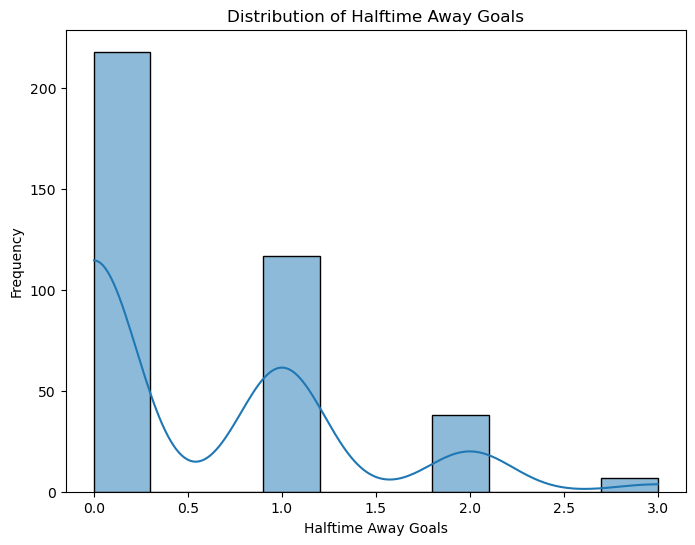

In [39]:
#Example: Create Histogram of Halftime Away Goals (HTAG)
plt.figure(figsize=(8, 6))
sns.histplot(df['HTAG'], bins = 10, kde=True)
plt.title('Distribution of Halftime Away Goals')
plt.xlabel('Halftime Away Goals')
plt.ylabel('Frequency')
plt.show()

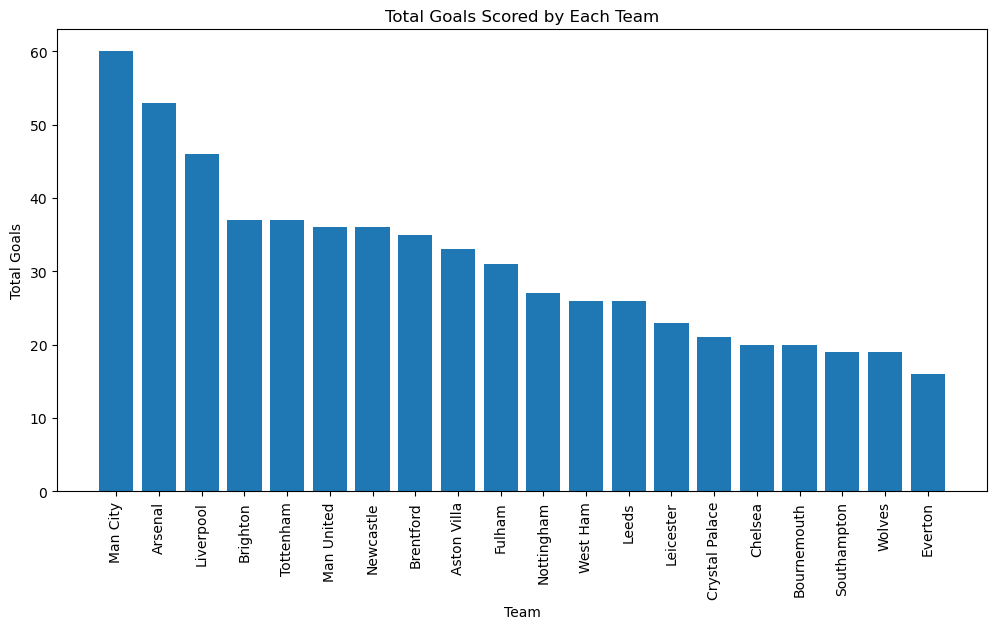

In [44]:
# Group data by HomeTeam and sum the goals
home_goals = df.groupby('HomeTeam')['FTHG'].sum().reset_index()

# Group data by AwayTeam and sum the goals
away_goals = df.groupby('AwayTeam')['FTAG'].sum().reset_index()

# Combine home and away goals for each team
total_goals = pd.concat([home_goals, away_goals])
total_goals = total_goals.groupby('HomeTeam')['FTHG'].sum().reset_index()

# Sort by total goals
total_goals = total_goals.sort_values(by='FTHG', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(total_goals['HomeTeam'], total_goals['FTHG'])
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored by Each Team')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

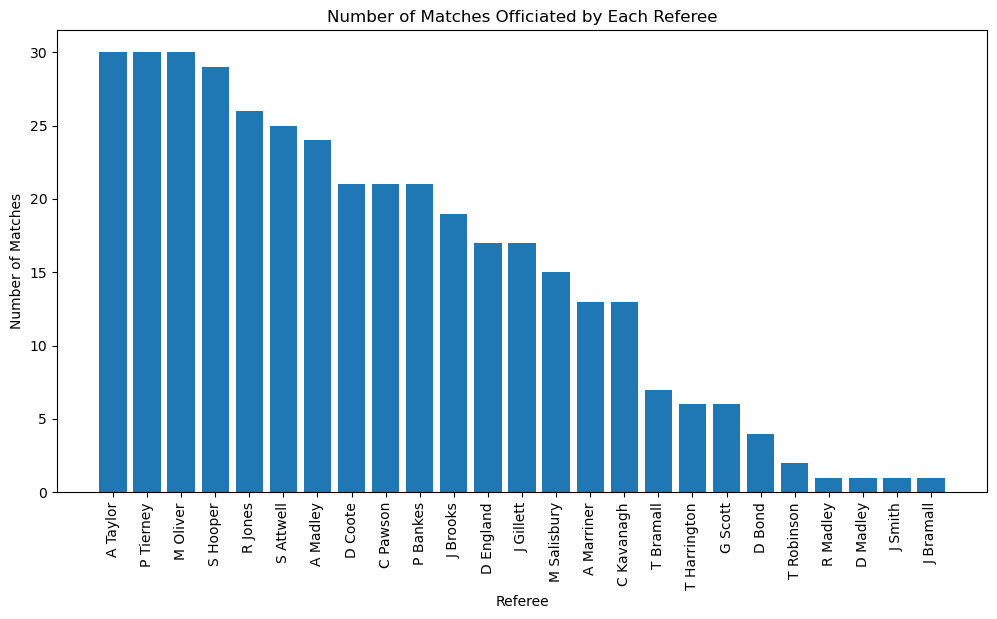

In [45]:
import matplotlib.pyplot as plt

# Count the number of matches for each referee
referee_counts = df['Referee'].value_counts().reset_index()
referee_counts.columns = ['Referee', 'Match Count']

# Sort referees by the number of matches they've officiated
referee_counts = referee_counts.sort_values(by='Match Count', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(referee_counts['Referee'], referee_counts['Match Count'])
plt.xlabel('Referee')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Officiated by Each Referee')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


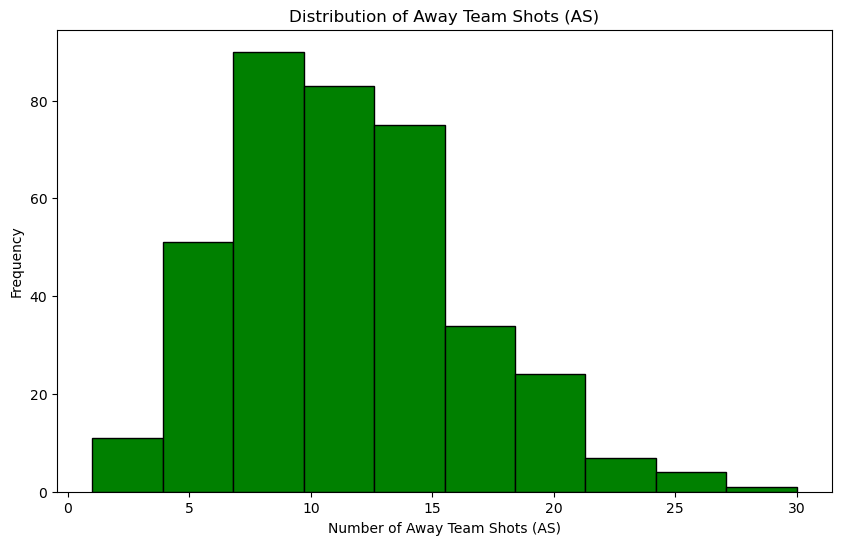

In [47]:
import matplotlib.pyplot as plt

# Create a histogram for the AS column
plt.figure(figsize=(10, 6))
plt.hist(df['AS'], bins=10, color='green', edgecolor='black')
plt.xlabel('Number of Away Team Shots (AS)')
plt.ylabel('Frequency')
plt.title('Distribution of Away Team Shots (AS)')
plt.show()


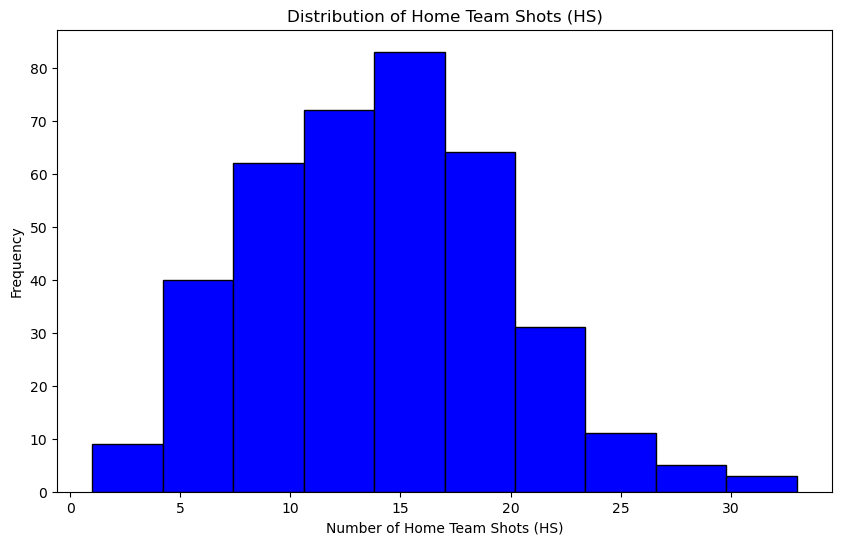

In [48]:
import matplotlib.pyplot as plt

# Create a histogram for the HS column
plt.figure(figsize=(10, 6))
plt.hist(df['HS'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Number of Home Team Shots (HS)')
plt.ylabel('Frequency')
plt.title('Distribution of Home Team Shots (HS)')
plt.show()


In [ ]:
# Create a histogram for the  column
plt.figure(figsize=(10, 6))
plt.hist(df['HS'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Number of Home Team Shots (HS)')
plt.ylabel('Frequency')
plt.title('Distribution of Home Team Shots (HS)')
plt.show()

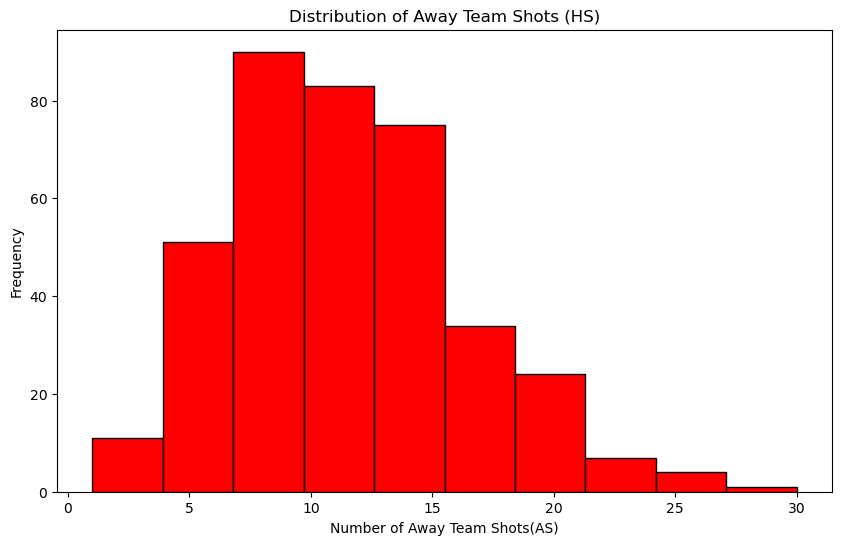

In [55]:
#Create a histogram for the AS column 
plt.figure(figsize=(10, 6))
plt.hist(df['AS'], bins=10, color='red', edgecolor='black')
plt.xlabel('Number of Away Team Shots(AS)')
plt.ylabel('Frequency')
plt.title('Distribution of Away Team Shots (HS)')
plt.show()

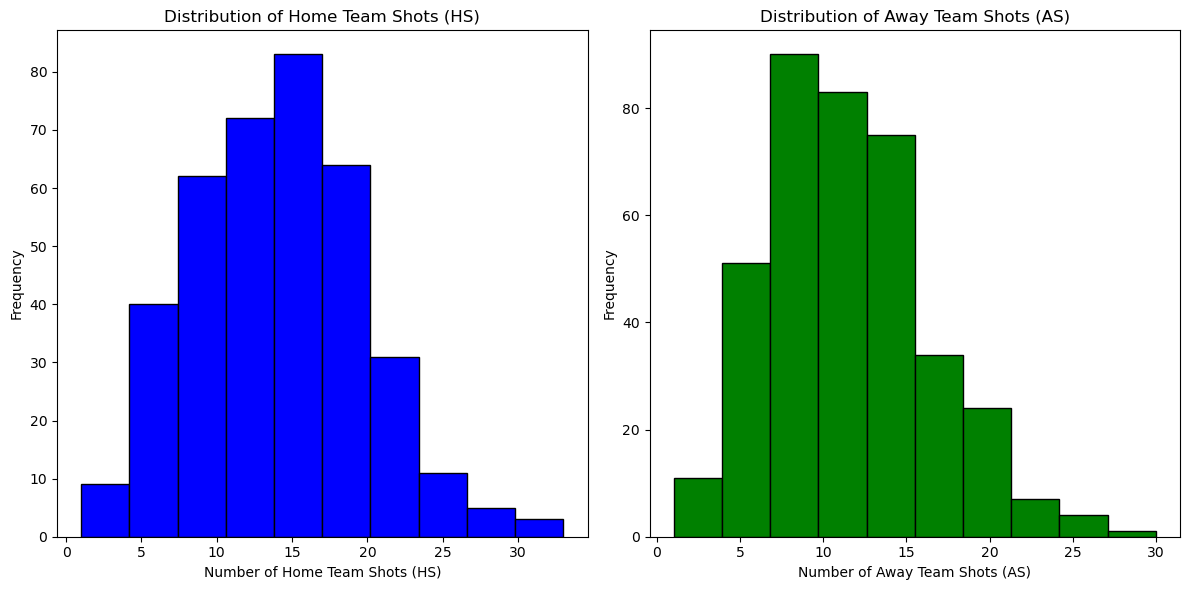

In [61]:
import matplotlib.pyplot as plt

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram for home team shots (HS) on the first subplot
axes[0].hist(df['HS'], bins=10, color='blue', edgecolor='black')
axes[0].set_xlabel('Number of Home Team Shots (HS)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Home Team Shots (HS)')

# Plot the histogram for away team shots (AS) on the second subplot
axes[1].hist(df['AS'], bins=10, color='green', edgecolor='black')
axes[1].set_xlabel('Number of Away Team Shots (AS)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Away Team Shots (AS)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


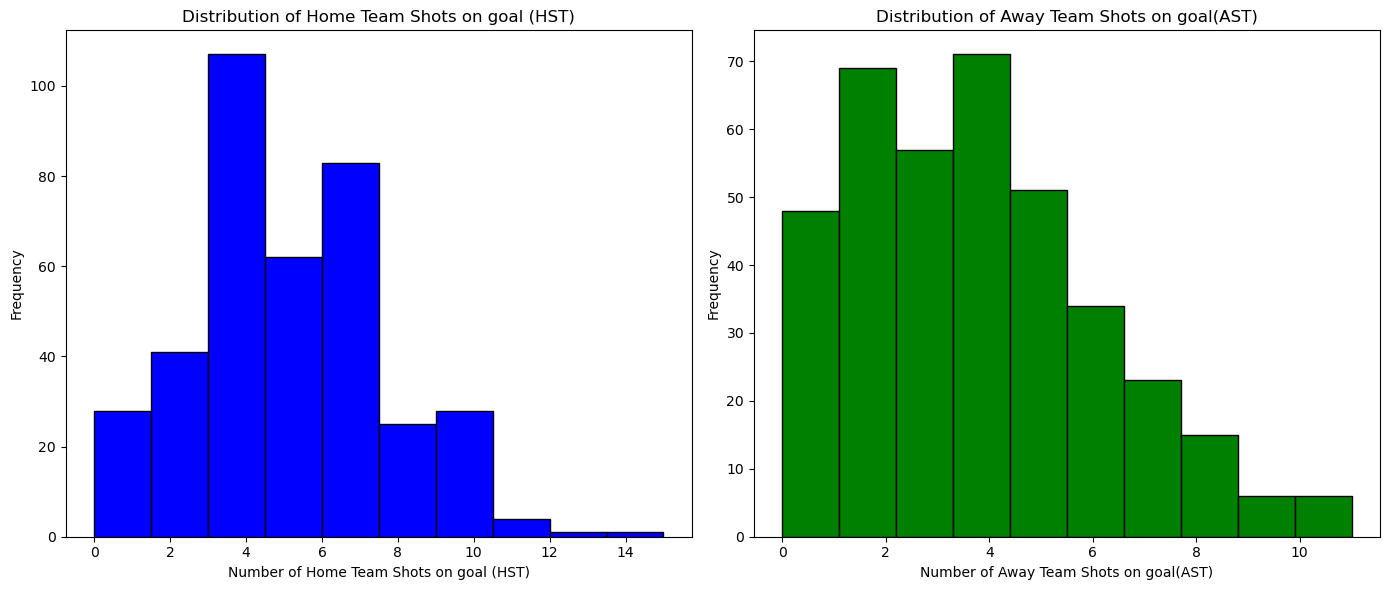

In [67]:
import matplotlib.pyplot as plt

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the histogram for home team shots on goal (HST) on the first subplot
axes[0].hist(df['HST'], bins=10, color='blue', edgecolor='black')
axes[0].set_xlabel('Number of Home Team Shots on goal (HST)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Home Team Shots on goal (HST)')

# Plot the histogram for away team shots on goal (AST) on the second subplot
axes[1].hist(df['AST'], bins=10, color='green', edgecolor='black')
axes[1].set_xlabel('Number of Away Team Shots on goal(AST)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Away Team Shots on goal(AST)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


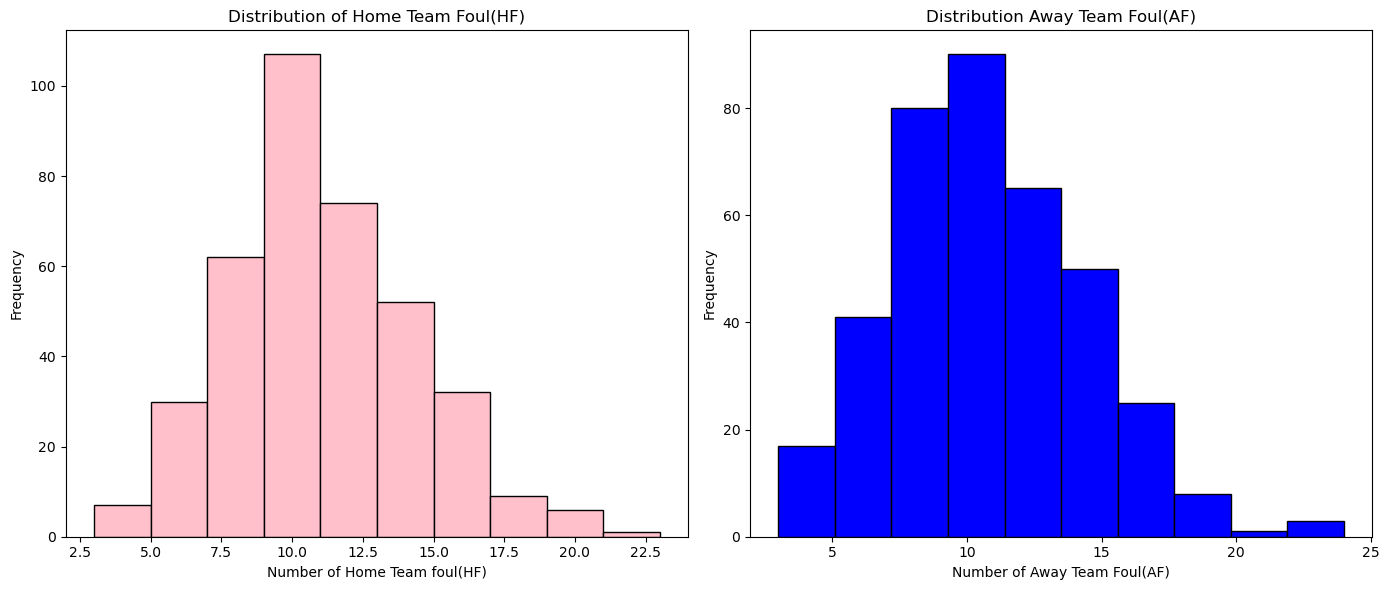

In [70]:
#create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1,2, figsize=(14, 6))
#PLOT THE HISTOGRAM FOR HOME TEAM FOUL ON FIRST SUBPLOT (HF)
axes[0].hist(df['HF'], color = 'pink', edgecolor='black')
axes[0].set_xlabel('Number of Home Team foul(HF)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Home Team Foul(HF)')

#plot the second histogram for away team foul(AF)
axes[1].hist(df['AF'], color='blue', edgecolor='black')
axes[1].set_title('Distribution Away Team Foul(AF)')
axes[1].set_xlabel('Number of Away Team Foul(AF)')
axes[1].set_ylabel('Frequency')

#Adjusting spaces between subplots
plt.tight_layout()

#show the combined plot
plt.show()



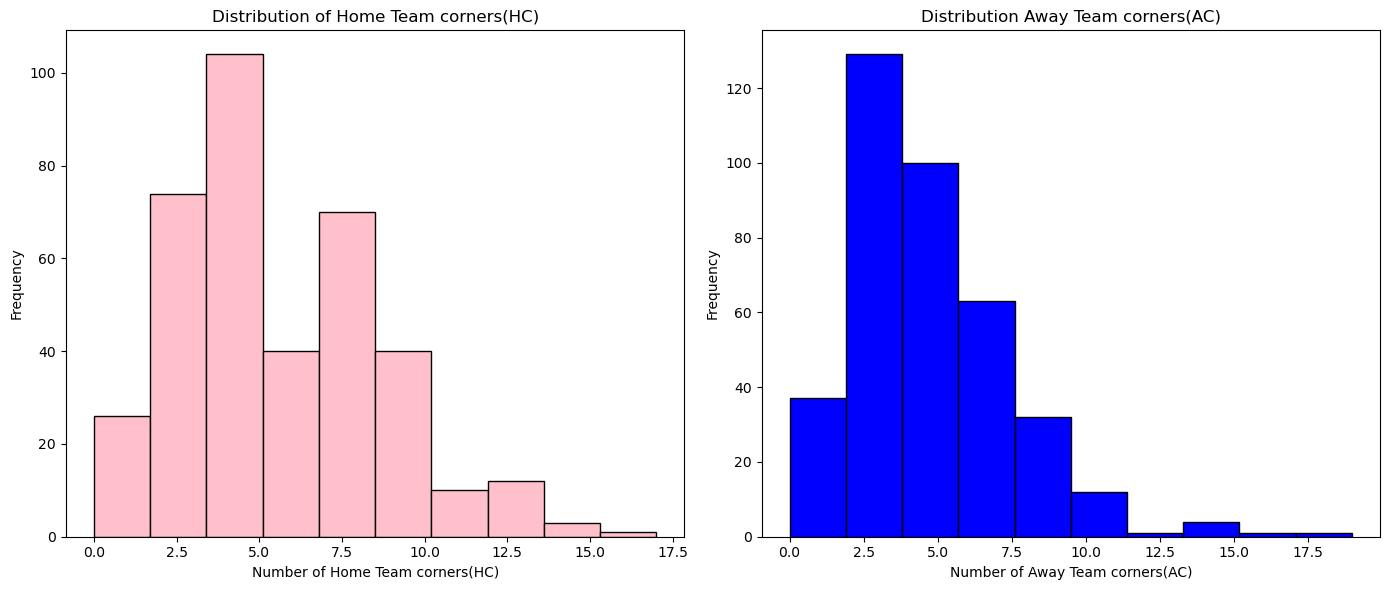

In [71]:
#create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1,2, figsize=(14, 6))
#PLOT THE HISTOGRAM FOR HOME TEAM CORNERS ON FIRST SUBPLOT (HC)
axes[0].hist(df['HC'], color = 'pink', edgecolor='black')
axes[0].set_xlabel('Number of Home Team corners(HC)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Home Team corners(HC)')

#plot the second histogram for away team corners(AC)
axes[1].hist(df['AC'], color='blue', edgecolor='black')
axes[1].set_title('Distribution Away Team corners(AC)')
axes[1].set_xlabel('Number of Away Team corners(AC)')
axes[1].set_ylabel('Frequency')

#Adjusting spaces between subplots
plt.tight_layout()

#show the combined plot
plt.show()



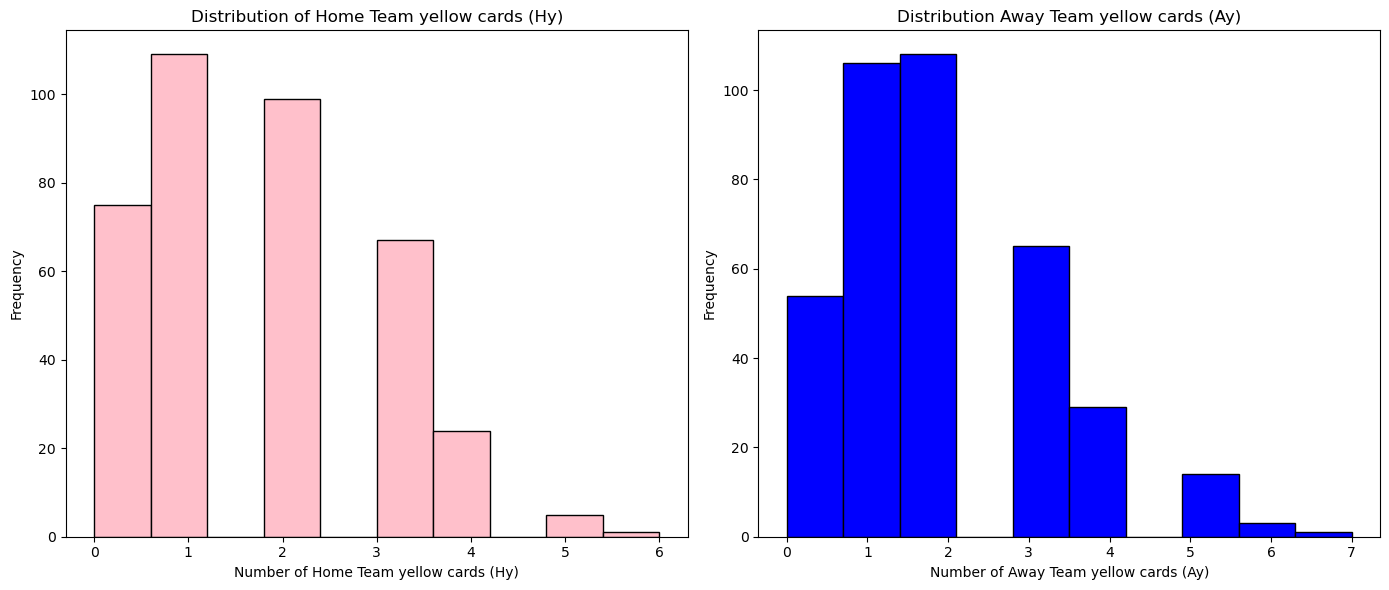

In [72]:
#create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1,2, figsize=(14, 6))
#PLOT THE HISTOGRAM FOR HOME TEAM YELLOW CARDS ON FIRST SUBPLOT (Hy)
axes[0].hist(df['HY'], color = 'pink', edgecolor='black')
axes[0].set_xlabel('Number of Home Team yellow cards (Hy)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Home Team yellow cards (Hy)')

#plot the second histogram for away team Yellow cards (Ay)
axes[1].hist(df['AY'], color='blue', edgecolor='black')
axes[1].set_title('Distribution Away Team yellow cards (Ay)')
axes[1].set_xlabel('Number of Away Team yellow cards (Ay)')
axes[1].set_ylabel('Frequency')

#Adjusting spaces between subplots
plt.tight_layout()

#show the combined plot
plt.show()



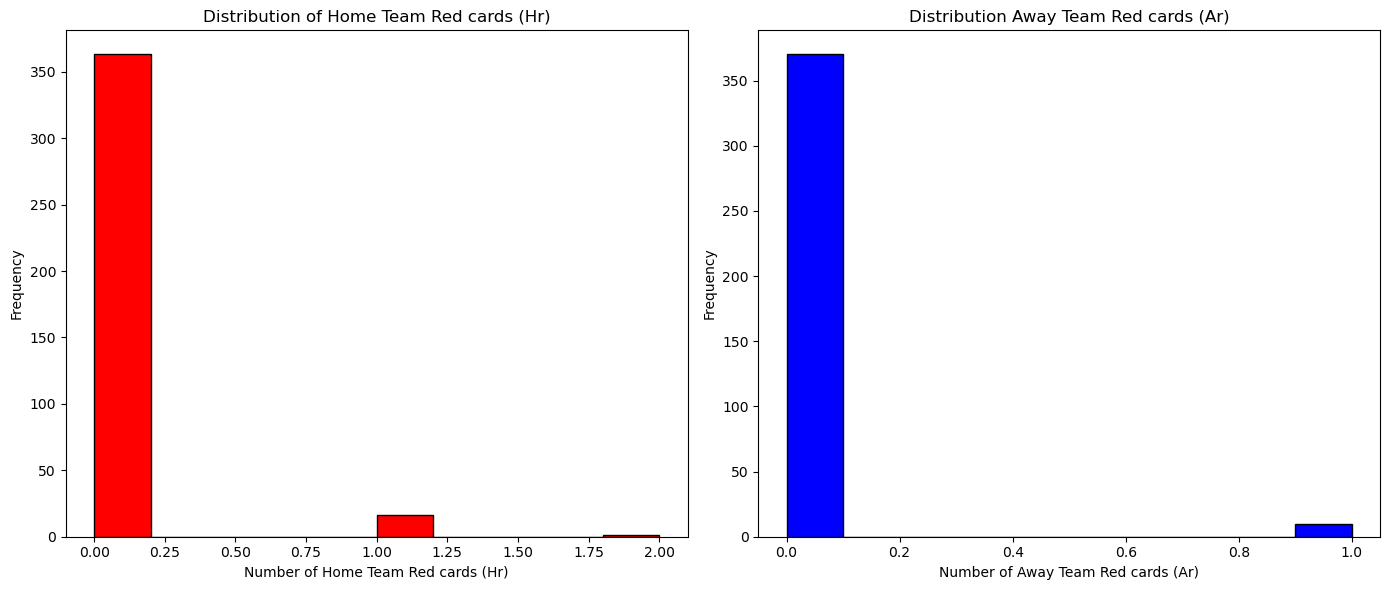

In [73]:
#create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1,2, figsize=(14, 6))
#PLOT THE HISTOGRAM FOR HOME TEAM RED CARDS ON FIRST SUBPLOT (Hr)
axes[0].hist(df['HR'], color = 'Red', edgecolor='black')
axes[0].set_xlabel('Number of Home Team Red cards (Hr)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Home Team Red cards (Hr)')

#plot the second histogram for away team Red cards (Ar)
axes[1].hist(df['AR'], color='blue', edgecolor='black')
axes[1].set_title('Distribution Away Team Red cards (Ar)')
axes[1].set_xlabel('Number of Away Team Red cards (Ar)')
axes[1].set_ylabel('Frequency')

#Adjusting spaces between subplots
plt.tight_layout()

#show the combined plot
plt.show()



In [74]:
# Assuming your dataset is loaded into a DataFrame called df

# Calculate winning percentages for HomeTeam
home_team_wins = df[df['FTR'] == 'H']['HomeTeam'].value_counts()
total_home_matches = df['HomeTeam'].value_counts()
home_team_win_percentage = (home_team_wins / total_home_matches).fillna(0) * 100

# Calculate winning percentages for AwayTeam
away_team_wins = df[df['FTR'] == 'A']['AwayTeam'].value_counts()
total_away_matches = df['AwayTeam'].value_counts()
away_team_win_percentage = (away_team_wins / total_away_matches).fillna(0) * 100

# Combine the results into a DataFrame for analysis or visualization
winning_percentage_df = pd.DataFrame({
    'HomeTeam': home_team_win_percentage,
    'AwayTeam': away_team_win_percentage
})

# Display the winning percentages for each team
print(winning_percentage_df)






                 HomeTeam   AwayTeam
Arsenal         73.684211  63.157895
Aston Villa     63.157895  31.578947
Bournemouth     31.578947  26.315789
Brentford       52.631579  26.315789
Brighton        52.631579  42.105263
Chelsea         31.578947  26.315789
Crystal Palace  36.842105  21.052632
Everton         31.578947  10.526316
Fulham          42.105263  36.842105
Leeds           26.315789  10.526316
Leicester       26.315789  21.052632
Liverpool       68.421053  31.578947
Man City        89.473684  57.894737
Man United      78.947368  42.105263
Newcastle       57.894737  42.105263
Nottingham      42.105263   5.263158
Southampton     10.526316  21.052632
Tottenham       63.157895  31.578947
West Ham        42.105263  15.789474
Wolves          47.368421  10.526316


## GOAL STATISTICS

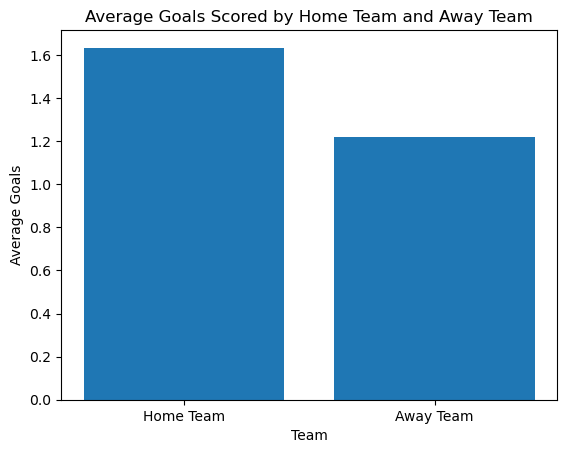

In [76]:
import matplotlib.pyplot as plt

# Calculate average goals scored by HomeTeam and AwayTeam
avg_home_goals = df['FTHG'].mean()
avg_away_goals = df['FTAG'].mean()

# Visualize the average goals
plt.bar(['Home Team', 'Away Team'], [avg_home_goals, avg_away_goals])
plt.xlabel('Team')
plt.ylabel('Average Goals')
plt.title('Average Goals Scored by Home Team and Away Team')
plt.show()


# WINNING STREAKS

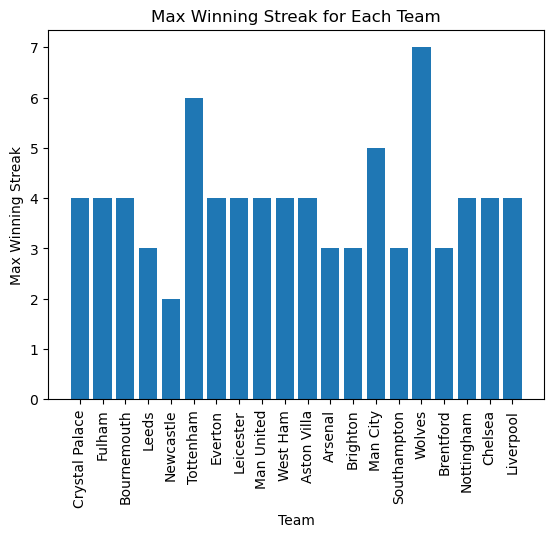

In [77]:
# Create a function to find winning streaks
def find_winning_streaks(team_results):
    streaks = []
    current_streak = 0

    for result in team_results:
        if result == 'H':
            current_streak += 1
        else:
            streaks.append(current_streak)
            current_streak = 0

    return max(streaks)

# Calculate and visualize winning streaks for each team
teams = df['HomeTeam'].unique()
max_streaks = {}

for team in teams:
    team_results = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]['FTR']
    max_streak = find_winning_streaks(team_results)
    max_streaks[team] = max_streak

plt.bar(max_streaks.keys(), max_streaks.values())
plt.xlabel('Team')
plt.ylabel('Max Winning Streak')
plt.title('Max Winning Streak for Each Team')
plt.xticks(rotation=90)
plt.show()


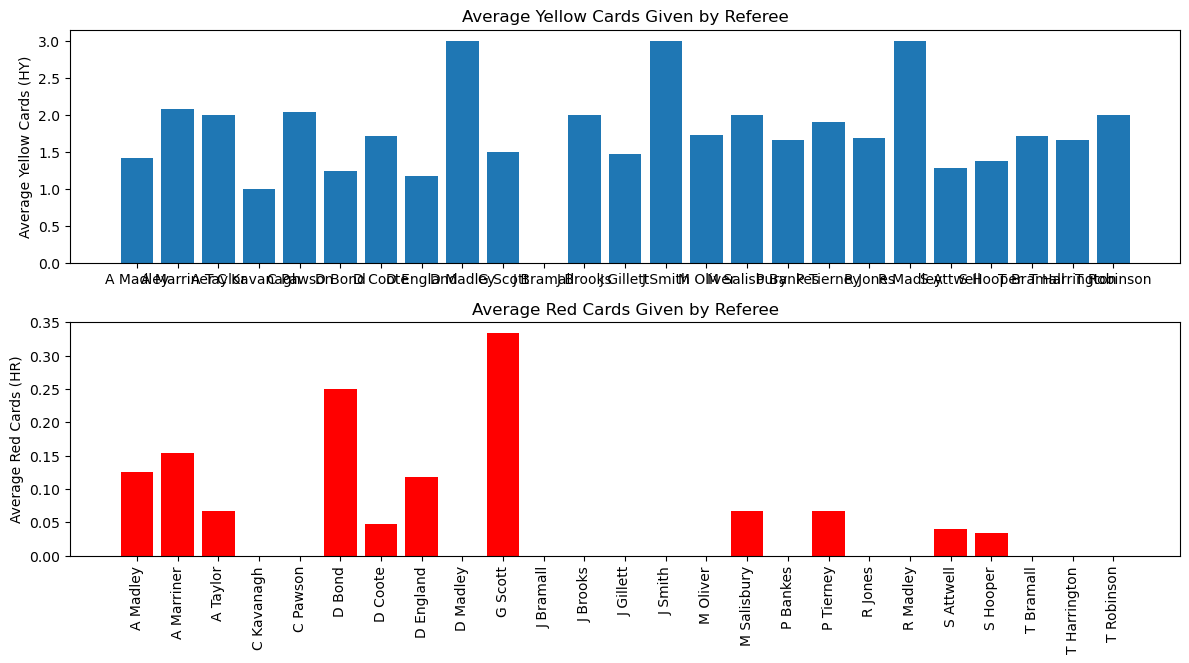

In [78]:
# Calculate average yellow cards (HY) and red cards (HR) given by each referee
referee_avg_yellow_cards = df.groupby('Referee')['HY'].mean()
referee_avg_red_cards = df.groupby('Referee')['HR'].mean()

# Visualize referee analysis
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.bar(referee_avg_yellow_cards.index, referee_avg_yellow_cards.values)
plt.ylabel('Average Yellow Cards (HY)')
plt.title('Average Yellow Cards Given by Referee')

plt.subplot(2, 1, 2)
plt.bar(referee_avg_red_cards.index, referee_avg_red_cards.values, color='red')
plt.ylabel('Average Red Cards (HR)')
plt.title('Average Red Cards Given by Referee')

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

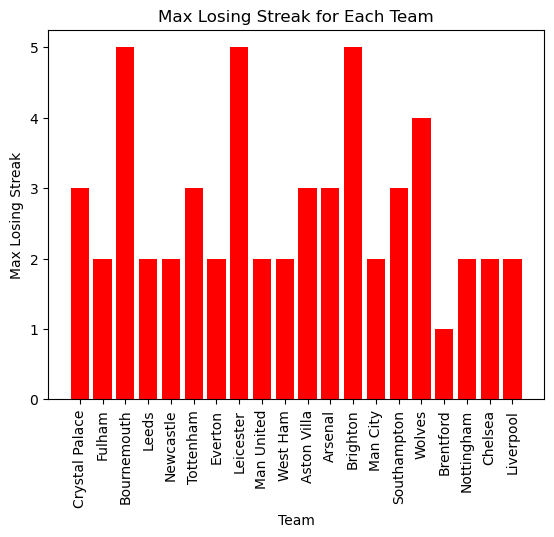

In [79]:
# Create a function to find losing streaks
def find_losing_streaks(team_results):
    streaks = []
    current_streak = 0

    for result in team_results:
        if result == 'A':
            current_streak += 1
        else:
            streaks.append(current_streak)
            current_streak = 0

    return max(streaks)

# Calculate and visualize losing streaks for each team
max_losing_streaks = {}

for team in teams:
    team_results = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]['FTR']
    max_losing_streak = find_losing_streaks(team_results)
    max_losing_streaks[team] = max_losing_streak

plt.bar(max_losing_streaks.keys(), max_losing_streaks.values(), color='red')
plt.xlabel('Team')
plt.ylabel('Max Losing Streak')
plt.title('Max Losing Streak for Each Team')
plt.xticks(rotation=90)
plt.show()


In [80]:
import pandas as pd

# Load your dataset (assuming you have already loaded it as 'df')

# Create an empty dictionary to store team information
teams = {}

# Iterate through each row in the dataset
for index, row in df.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    ftr = row['FTR']

    # Initialize team information if not already present
    if home_team not in teams:
        teams[home_team] = {'Points': 0, 'GoalsFor': 0, 'GoalsAgainst': 0}
    if away_team not in teams:
        teams[away_team] = {'Points': 0, 'GoalsFor': 0, 'GoalsAgainst': 0}

    # Update team statistics based on match result
    if ftr == 'H':  # Home team wins
        teams[home_team]['Points'] += 3
    elif ftr == 'A':  # Away team wins
        teams[away_team]['Points'] += 3
    else:  # It's a draw
        teams[home_team]['Points'] += 1
        teams[away_team]['Points'] += 1

    # Update goals for and against
    teams[home_team]['GoalsFor'] += row['FTHG']
    teams[home_team]['GoalsAgainst'] += row['FTAG']
    teams[away_team]['GoalsFor'] += row['FTAG']
    teams[away_team]['GoalsAgainst'] += row['FTHG']

# Create a DataFrame for the league table
league_table = pd.DataFrame(teams).T
league_table.reset_index(inplace=True)
league_table.rename(columns={'index': 'Team'}, inplace=True)

# Calculate goal difference
league_table['GoalDifference'] = league_table['GoalsFor'] - league_table['GoalsAgainst']

# Sort the DataFrame by Points, Goal Difference, and Goals For (in that order)
league_table.sort_values(by=['Points', 'GoalDifference', 'GoalsFor'], ascending=False, inplace=True)

# Reset the DataFrame index
league_table.reset_index(drop=True, inplace=True)

# Display the league table
print(league_table)


              Team  Points  GoalsFor  GoalsAgainst  GoalDifference
0         Man City      89        94            33              61
1          Arsenal      84        88            43              45
2       Man United      75        58            43              15
3        Newcastle      71        68            33              35
4        Liverpool      67        75            47              28
5         Brighton      62        72            53              19
6      Aston Villa      61        51            46               5
7        Tottenham      60        70            63               7
8        Brentford      59        58            46              12
9           Fulham      52        55            53               2
10  Crystal Palace      45        40            49              -9
11         Chelsea      44        38            47              -9
12          Wolves      41        31            58             -27
13        West Ham      40        42            55            

In [81]:
league_table.reset_index(drop=True, inplace=True)


In [82]:
league_table.reset_index(drop=True, inplace=True)
league_table.index += 1  # Add 1 to the index


In [83]:
print(league_table)

              Team  Points  GoalsFor  GoalsAgainst  GoalDifference
1         Man City      89        94            33              61
2          Arsenal      84        88            43              45
3       Man United      75        58            43              15
4        Newcastle      71        68            33              35
5        Liverpool      67        75            47              28
6         Brighton      62        72            53              19
7      Aston Villa      61        51            46               5
8        Tottenham      60        70            63               7
9        Brentford      59        58            46              12
10          Fulham      52        55            53               2
11  Crystal Palace      45        40            49              -9
12         Chelsea      44        38            47              -9
13          Wolves      41        31            58             -27
14        West Ham      40        42            55            